In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("/Users/sanjoymondal/Downloads/Salary Prediction Based on work experience ML Web App/Salary_Data.csv")

In [10]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [18]:
data.shape

(30, 2)

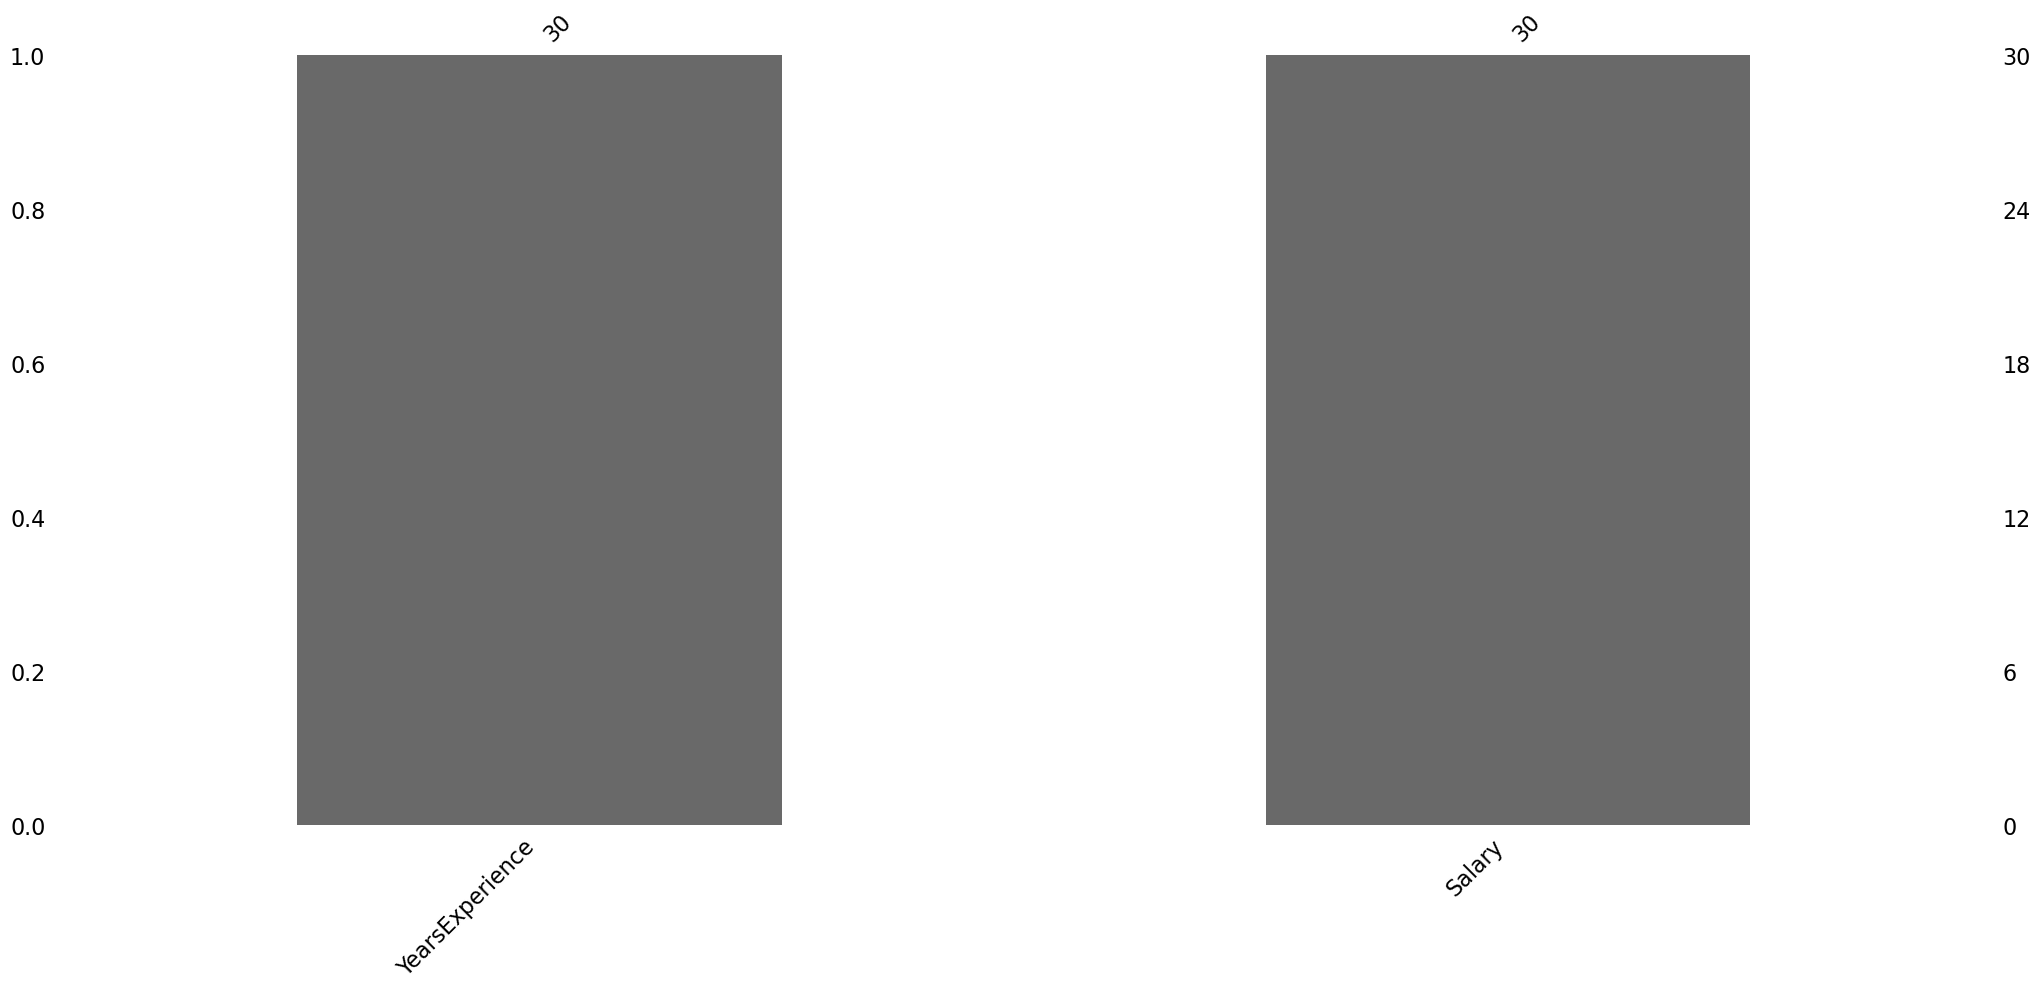

In [16]:
import missingno as msno
msno.bar(data)
plt.show()

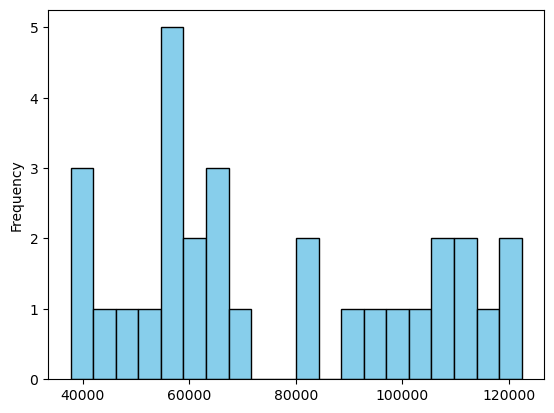

In [12]:
data['Salary'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Salary',axis=1),
    data['Salary'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((21, 1), (9, 1))

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
rmse

4834.260936361728

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_predict)
print("Accuracy: ",r2)

Accuracy:  0.9740993407213511


In [32]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [34]:
dec_score = DTR.score(X_train,y_train)
print(dec_score)

0.9859625000106256


In [36]:
dtr_score = DTR.score(X_test,y_test)
dtr_score

0.9528765571112003

In [38]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=5,random_state=0)
RF.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [40]:
rf = RF.score(X_train,y_train)
print(rf)

0.9749720667447406


In [42]:
rf_score = RF.score(X_test,y_test)
rf_score

0.941415255687145

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_regressor.fit(X_train_scaled, y_train)

# 6. Make Predictions
y_pred = knn_regressor.predict(X_test_scaled)

# 7. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2_knn:.2f}")

Mean Squared Error: 53929550.44
R^2 Score: 0.94


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# 5. Make Predictions
y_pred = gbr_model.predict(X_test)

# 6. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2_gbr = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2_gbr:.2f}")

Mean Squared Error: 64475266.46
R^2 Score: 0.93


In [58]:
mylist=[]
mylist2=[]
mylist.append(r2)
mylist2.append("LinearRegression")
mylist.append(dtr_score)
mylist2.append("Decision Tree Regressor")
mylist.append(rf_score)
mylist2.append("RandomForest Regressor")
mylist.append(r2_knn)
mylist2.append("KNeighborsRegressor")
mylist.append(r2_gbr)
mylist2.append("GradientBoostingRegressor")

/var/folders/vp/fymvgyb52557nq9jx71gvcs80000gn/T/ipykernel_2916/1705305665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)


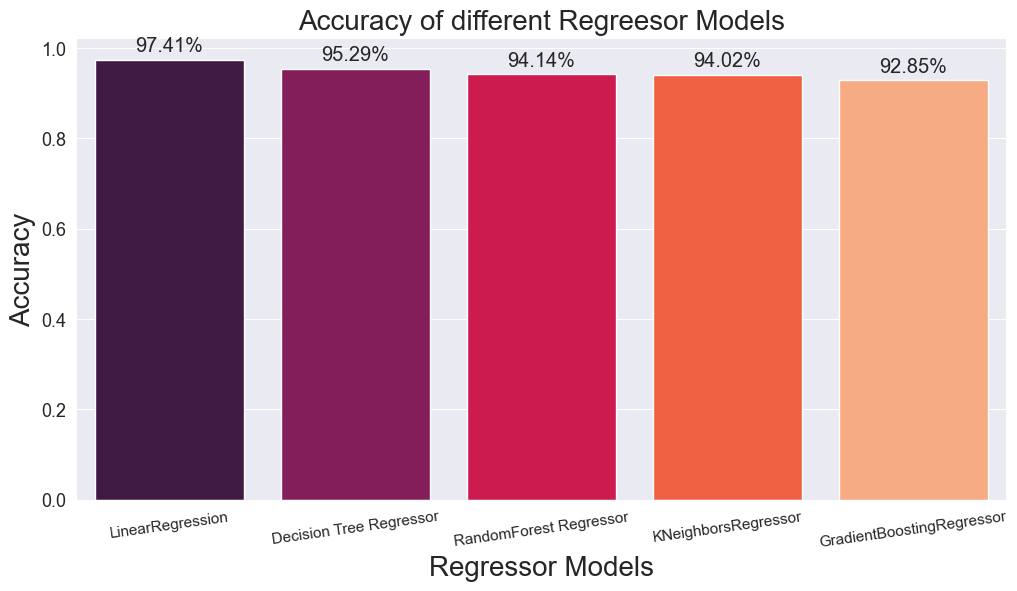

In [60]:
plt.rcParams['figure.figsize']=12,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Regressor Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Regreesor Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()